In [4]:
from google.colab import drive
drive.mount('/content/drive')
import matplotlib.font_manager as fm
font_path = "/content/drive/MyDrive/IT2022/Montserrat-Medium.ttf"
fm.fontManager.addfont(font_path)

Mounted at /content/drive


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from lightgbm import LGBMClassifier
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Load your dataset
path = '/content/drive/MyDrive/IT2022/SMOTE Credit Card Data for Train.csv'
df = pd.read_csv(path)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,71174.0,-2.108259,1.173406,1.614294,0.482867,0.067209,-0.191013,0.191246,-1.705859,-0.177615,...,1.520625,-0.388595,0.260114,0.340667,0.400474,-0.413089,-0.348291,0.215298,19.99,0
1,169683.0,2.313997,-1.311064,-1.421228,-1.724356,-1.003480,-0.912621,-0.898765,-0.221952,-1.658076,...,0.089446,0.664605,0.029245,-0.347503,0.069152,0.074159,-0.024483,-0.076422,15.00,0
2,111127.0,2.104946,0.155284,-1.402870,0.311489,0.504248,-0.690870,0.138943,-0.417801,1.894584,...,0.107745,0.759527,-0.022144,0.465282,0.402861,-0.478955,-0.016524,-0.053868,1.00,0
3,152052.0,2.072408,-0.015687,-1.310880,0.373435,-0.063476,-1.380722,0.243699,-0.394350,0.631048,...,0.243262,0.858393,0.003403,0.077370,0.259102,-0.110464,-0.021166,-0.058972,1.99,0
4,123008.0,2.046409,0.156335,-2.006987,0.384525,0.604029,-0.756561,0.232367,-0.230789,0.072474,...,0.326565,1.165945,-0.109465,0.793698,0.377195,0.837559,-0.075171,-0.053246,1.57,0


In [7]:
# Drop non-feature columns if needed
feature_cols = [col for col in df.columns if col not in ['Class']]
X = df[feature_cols]
y = df['Class']

In [22]:
# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=feature_cols)

In [16]:
# Split data (60/20/20)
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.4, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)


In [18]:
# Train LightGBM
model = LGBMClassifier(random_state=42)
model.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 102353, number of negative: 102353
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.071059 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 204706, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


LGBMClassifier(random_state=42)

In [23]:
# Feature importance
importances = model.feature_importances_
feature_names = X_train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df

,Feature,Importance
0,Time,222
14,V14,209
4,V4,208
12,V12,142
10,V10,127
3,V3,123
7,V7,123
11,V11,117
16,V16,117
17,V17,115


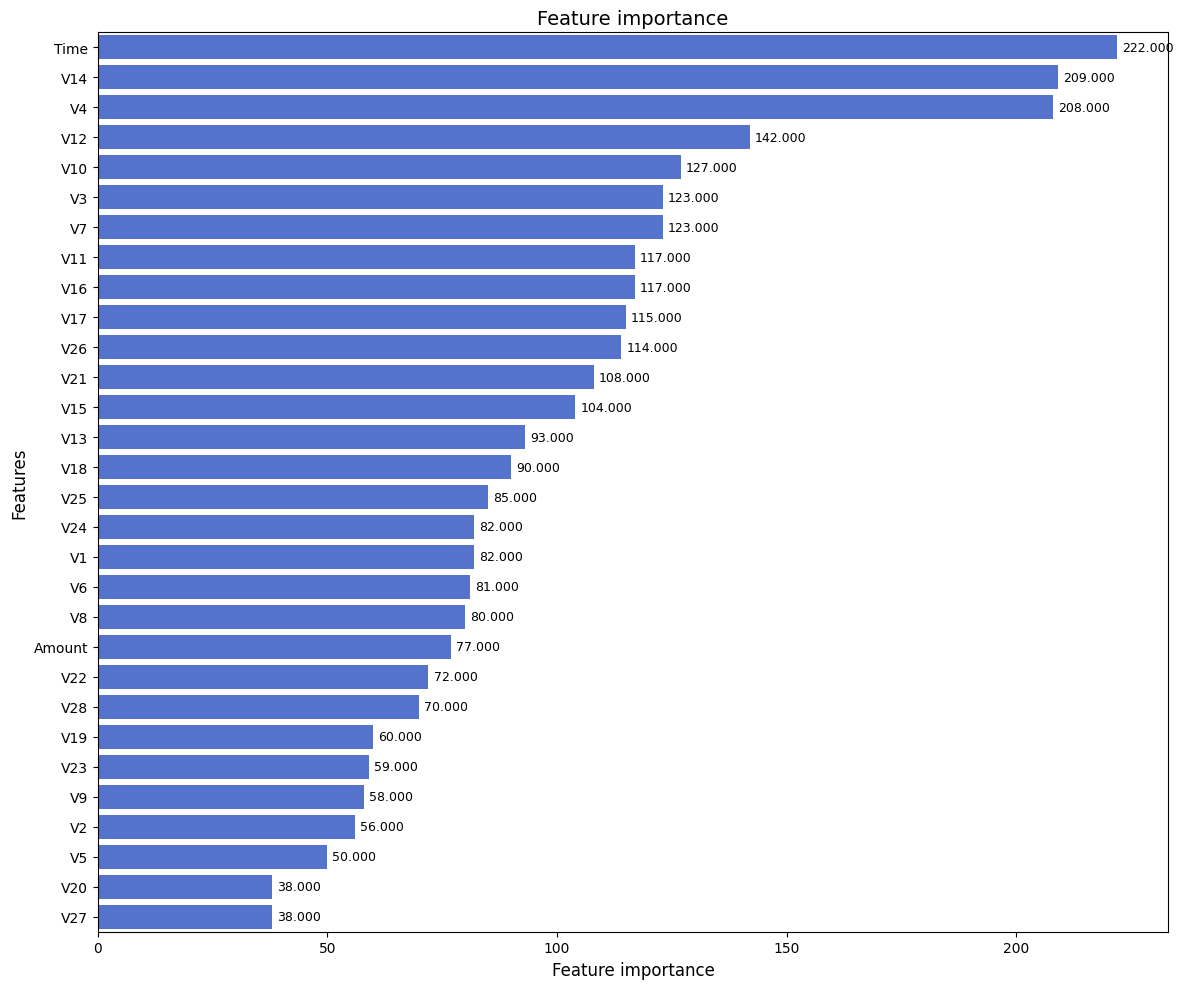

In [25]:
#Plot
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 10))
sns.barplot(data=importance_df, y='Feature', x='Importance', color='royalblue')

for i, (value, name) in enumerate(zip(importance_df['Importance'], importance_df['Feature'])):
    plt.text(value + max(importance_df['Importance']) * 0.005,
             i,
             f"{value:,.3f}",
             va='center',
             fontsize=9)

plt.title('Feature importance', fontsize=14)
plt.xlabel('Feature importance', fontsize=12)
plt.ylabel('Features', fontsize=12)

plt.tight_layout()
plt.show()